* **STORY OF THE DATASET**

* CreditScore-->Customer's credit score
* Geography-->Customer's country of residence
* Gender-->Gender of the client
* Age-->Customer's Age
* Tenure-->Time of working with the customer bank (in years)
* Balance-->Balance in the customer's account
* NumOfProducts--->Number of products used by the customer from the bank
* HasCrCard--> Whether the customer has a credit card
* IsActiveMember--> Whether the customer is an active customer of the bank (0: not, 1: yes)
* EstimatedSalary-->Client's estimated salary
* Exited--> Whether the customer has left the bank (0: no, 1: yes).

* **STEPS**
* Elimination of unnecessary columns
* Converting categorical variables to numeric form using get_dummies
* Creation of retirement column
* Derivation of new variables
* Grouping of age and credit score columns
* Visualization of churn and non-churn values using a pie chart
* Generating synthetic data using SMOTE due to an imbalance between churn and non-churn data
* plotting boxplot to detect columns with outliers
* scaling of certain features with robust scaler
* saving dataset

# DATA CLEANING

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE

In [2]:
data=pd.read_csv("Churn_Predictions.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


* **Elimination of unnecessary columns**

In [3]:
# remove unnecessary columns
data=data.drop(["RowNumber","CustomerId","Surname"],axis=1)
data_2=data.copy()
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


* **Converting categorical variables to numeric form using get_dummies**

In [4]:
#conversion of categorical gender and country columns to numeric form
data=pd.get_dummies(data,drop_first=True)

data["Geography"]=data_2["Geography"]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["Geography"]=le.fit_transform(data["Geography"])

data.head() 

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,Geography
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0,2
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0,2


* **Visualization of churn and non-churn values using a pie chart**

Text(0.5, 1.0, 'Churn percentile')

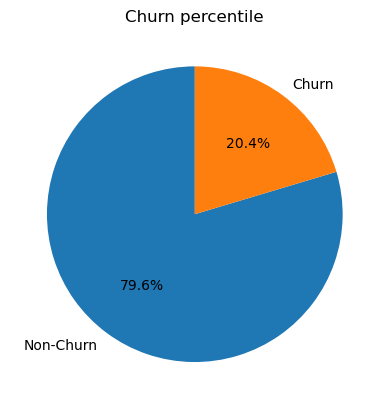

In [5]:
data_churn=data["Exited"].value_counts()
plt.pie(data_churn.values,labels=["Non-Churn","Churn"],autopct='%1.1f%%', startangle=90)
plt.title("Churn percentile")

In [6]:
#Determining the X and Y values
x=data.drop("Exited",axis=1).values
y=data["Exited"].values
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,Geography
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0,2
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0,2


* **Generating synthetic data using SMOTENC due to an imbalance between churn and non-churn data**

In [7]:
from imblearn.over_sampling import SMOTENC
cat_features = [5,6,8,9,10,11]
smote_nc = SMOTENC(categorical_features=cat_features, random_state=42)
x_resampled, y_resampled = smote_nc.fit_resample(x, y)

x_df=pd.DataFrame(x_resampled,columns=data.drop("Exited",axis=1).columns)
y_df=pd.DataFrame(y_resampled,columns=["Exited"])

new_data=pd.DataFrame(pd.concat([x_df,y_df],axis=1))
new_data.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Geography,Exited
0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,0.0,0.0,0.0,0.0,1
1,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0,1.0,0.0,2.0,0
2,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,0.0,0.0,0.0,0.0,1
3,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0,0.0,0.0,0.0,0
4,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0,1.0,0.0,2.0,0
5,645.0,44.0,8.0,113755.78,2.0,1.0,0.0,149756.71,0.0,1.0,1.0,2.0,1
6,822.0,50.0,7.0,0.00,2.0,1.0,1.0,10062.80,0.0,0.0,1.0,0.0,0
7,376.0,29.0,4.0,115046.74,4.0,1.0,0.0,119346.88,1.0,0.0,0.0,1.0,1
8,501.0,44.0,4.0,142051.07,2.0,0.0,1.0,74940.50,0.0,0.0,1.0,0.0,0
9,684.0,27.0,2.0,134603.88,1.0,1.0,1.0,71725.73,0.0,0.0,1.0,0.0,0


Text(0.5, 1.0, 'Churn percentile')

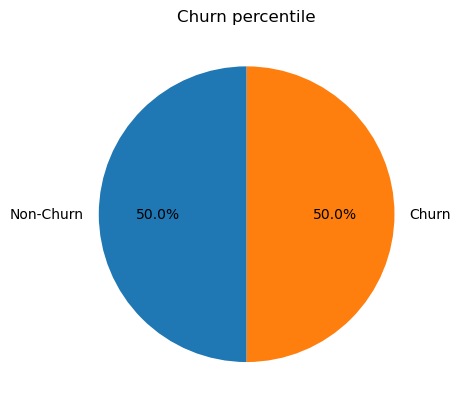

In [8]:
data_churn=new_data["Exited"].value_counts()
plt.pie(data_churn.values,labels=["Non-Churn","Churn"],autopct='%1.1f%%', startangle=90)
plt.title("Churn percentile")

In [9]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15926 entries, 0 to 15925
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        15926 non-null  float64
 1   Age                15926 non-null  float64
 2   Tenure             15926 non-null  float64
 3   Balance            15926 non-null  float64
 4   NumOfProducts      15926 non-null  float64
 5   HasCrCard          15926 non-null  float64
 6   IsActiveMember     15926 non-null  float64
 7   EstimatedSalary    15926 non-null  float64
 8   Geography_Germany  15926 non-null  float64
 9   Geography_Spain    15926 non-null  float64
 10  Gender_Male        15926 non-null  float64
 11  Geography          15926 non-null  float64
 12  Exited             15926 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 1.6 MB


In [10]:
new_data.sample(20)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Geography,Exited
5709,644.000000,39.000000,9.000000,0.000000,1.000000,1.0,0.0,3740.930000,0.0,0.0,0.0,0.0,0
14294,695.486892,38.726503,7.705123,108720.534775,1.000000,1.0,1.0,42059.839644,1.0,0.0,0.0,1.0,1
15114,635.024324,42.386873,2.153282,109345.842117,1.564479,1.0,1.0,88386.040346,1.0,0.0,0.0,1.0,1
10826,773.239488,51.509622,4.347113,0.000000,2.101924,1.0,0.0,94099.762001,0.0,0.0,1.0,0.0,1
1816,531.000000,29.000000,3.000000,114590.580000,1.000000,0.0,0.0,75585.480000,0.0,0.0,1.0,0.0,0
11109,792.929519,54.723881,6.241294,134986.722143,3.000000,1.0,0.0,152714.045865,0.0,0.0,0.0,0.0,1
15719,625.923355,51.631137,0.158084,133693.602976,1.000000,1.0,1.0,4926.201589,1.0,0.0,0.0,1.0,1
4135,712.000000,29.000000,3.000000,87375.780000,2.000000,0.0,0.0,166194.530000,0.0,0.0,0.0,0.0,0
11346,758.385765,49.546207,6.941150,121667.073778,1.000000,1.0,0.0,177043.543869,0.0,0.0,0.0,0.0,1
11763,572.841832,31.808438,9.827768,177090.833115,1.000000,1.0,0.0,96760.653724,0.0,0.0,0.0,2.0,1


In [11]:
data=new_data.copy()

* **Creation of retirement column**

In [12]:
# I created a retirement column
#I assigned 1 or 0 values according to the retirement age of the countries

#if she/he is a German citizen over 65, she is retired
data.loc[(data["Age"] >= 65) & (data["Geography_Germany"] == 1) , "Retirement"] = 1  

# if she/he is a Spanish citizen over 65 she is retired
data.loc[(data["Age"] >= 65) & (data["Geography_Spain"] == 1) , "Retirement"] = 1  

#if she/he is an italian citizen over 65 she is retired
data.loc[(data["Age"] >= 66) & (data["Geography_Spain"] == 0) & (data["Geography_Germany"] == 0 ) , "Retirement"] = 1  

data.loc[(data["Age"] < 65) & (data["Geography_Germany"] == 1) , "Retirement"] = 0

data.loc[(data["Age"]<65) & (data["Geography_Spain"]==1) , "Retirement"] = 0

data.loc[(data["Age"] < 66) & (data["Geography_Spain"] == 0) & (data["Geography_Germany"] == 0 ) , "Retirement"] = 0

data["Retirement"].value_counts()


0.0    15613
1.0      313
Name: Retirement, dtype: int64

* **Derivation of new variables**

In [13]:
#variable derivation
data["EstimatedSalary / Age"] = data["EstimatedSalary"] / data["Age"]

data["CreditScore / Age"] = data["CreditScore"] / data["Age"]

data["NumOfProducts / Tenure"] = data["NumOfProducts"] / (data["Tenure"]+1)

data["EstimatedSalary / CreditScore"] = data["EstimatedSalary"] / data["CreditScore"]

data["EstimatedSalary / Balance"] = data["EstimatedSalary"] / (data["Balance"]+1)

data["EstimatedSalary / Tenure"] = data["EstimatedSalary"] / (data["Tenure"] + 1)

data["EstimatedSalary / NumOfProducts"] = data["EstimatedSalary"] / data["NumOfProducts"]

data["CreditScore / Tenure"] = data["CreditScore"] / (data["Tenure"] + 1)

data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,...,Exited,Retirement,EstimatedSalary / Age,CreditScore / Age,NumOfProducts / Tenure,EstimatedSalary / CreditScore,EstimatedSalary / Balance,EstimatedSalary / Tenure,EstimatedSalary / NumOfProducts,CreditScore / Tenure
0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,0.0,0.0,...,1,0.0,2413.068571,14.738095,0.333333,163.730016,101348.880000,33782.960000,101348.880,206.333333
1,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0,1.0,...,0,0.0,2744.940976,14.829268,0.500000,185.102928,1.342848,56271.290000,112542.580,304.000000
2,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,0.0,0.0,...,1,0.0,2712.656429,11.952381,0.333333,226.955319,0.713581,12659.063333,37977.190,55.777778
3,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0,0.0,...,0,0.0,2405.811026,17.923077,1.000000,134.229800,93826.630000,46913.315000,46913.315,349.500000
4,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0,1.0,...,0,0.0,1839.165116,19.767442,0.333333,93.040118,0.630093,26361.366667,79084.100,283.333333


* **Grouping of age and credit score columns**

In [14]:
#Conversion of numeric variables to ordinal categorical data

data.loc[(data["Age"]>=18) & (data["Age"]<=30), "Age"]=1

data.loc[(data["Age"]>30) & (data["Age"]<=40), "Age"]=2

data.loc[(data["Age"]>40) & (data["Age"]<=50), "Age"]=3

data.loc[(data["Age"]>50) & (data["Age"]<=60), "Age"]=4

data.loc[(data["Age"]>60) & (data["Age"]<=92), "Age"]=5

data["Age"].value_counts()

2.0    5933
3.0    5052
4.0    2146
1.0    2138
5.0     657
Name: Age, dtype: int64

In [15]:
def credit_score(score):

    if score >= 300 and score < 500:
        return (2)
    
    elif score >= 500 and score < 601:
        return (3)
    
    elif score >= 601 and score < 661:
        return (4)
    
    elif score >= 661 and score < 781:
        return (5)
    
    elif score >= 851:
        return (7)
    
    elif score >= 781 and score < 851:
        return (6)
    
    elif score< 300:
        return (1)

data["CreditScore"]=data["CreditScore"].apply(credit_score)
data["CreditScore"].value_counts()

5    5991
3    3935
4    3873
6    1263
2     864
Name: CreditScore, dtype: int64

* **plotting boxplot to detect columns with outliers**

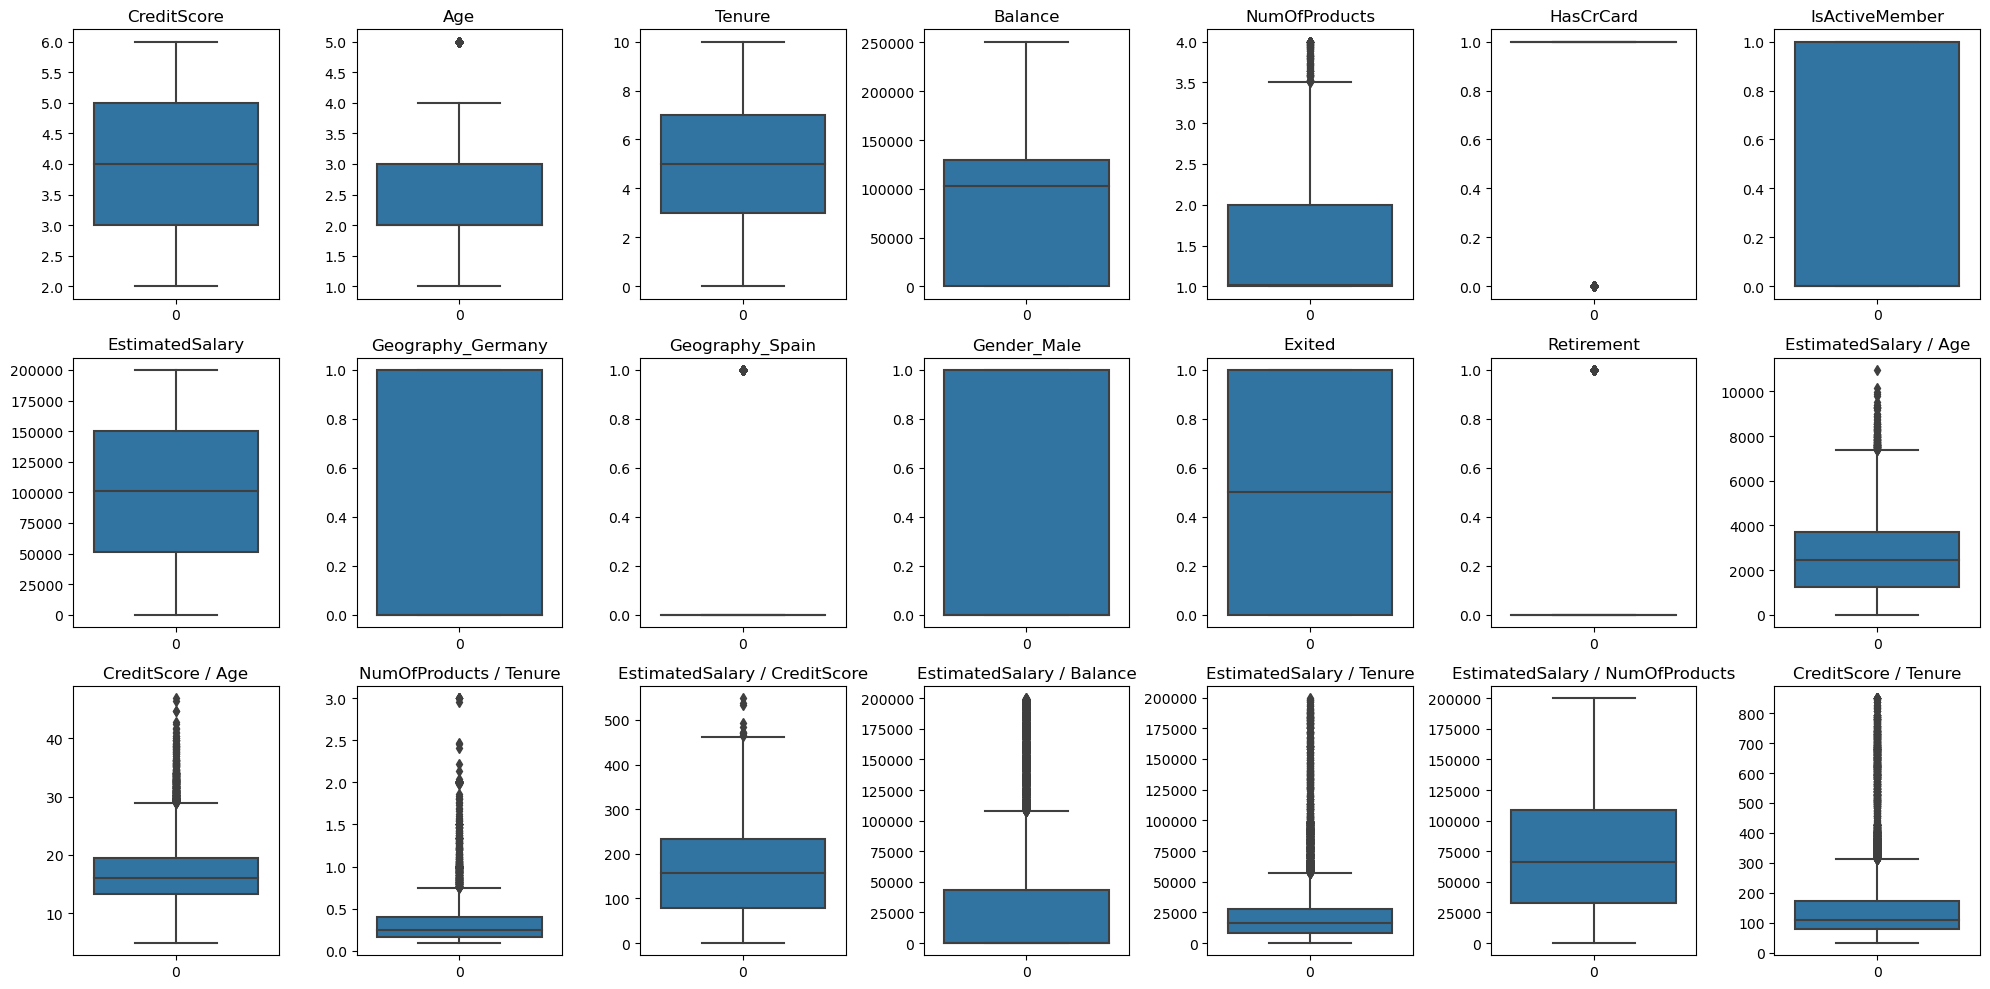

In [16]:
data_3=data.drop("Geography",axis=1)
columns=data_3.columns
fig, axs = plt.subplots(nrows=3, ncols=7, figsize=(20, 10))


for i, column in enumerate(columns):
    sns.boxplot(data_3[column], ax=axs[i//7, i%7])
    axs[i//7, i%7].set_title(column)

plt.tight_layout()
plt.show()

* **scaling of certain features with robust scaler**
* Robust Scaler is a preferred preprocessing method, especially when working with datasets containing outliers.

In [17]:
#I WILL USE THE ROBUSTSCALER METHOD FOR THESE VARIABLES:
col=data.iloc[:,13:].drop("EstimatedSalary / NumOfProducts",axis=1)

col_2=RobustScaler().fit_transform(col,col.columns)
col_2=pd.DataFrame(col_2,columns=col.columns)

for item in col.columns:
    data[item]=col_2[item]
    
data.sample(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,...,Exited,Retirement,EstimatedSalary / Age,CreditScore / Age,NumOfProducts / Tenure,EstimatedSalary / CreditScore,EstimatedSalary / Balance,EstimatedSalary / Tenure,EstimatedSalary / NumOfProducts,CreditScore / Tenure
15594,4,2.0,7.000000,75678.736364,2.643203,1.0,0.0,129782.054631,0.0,0.0,...,1,0.0,0.343470,0.089328,0.344573,0.267527,0.000011,-0.021423,49100.288654,-0.285259
1505,4,3.0,4.000000,132403.560000,1.000000,0.0,0.0,36091.910000,1.0,0.0,...,1,0.0,-0.686990,-0.541167,-0.214286,-0.628851,-0.000023,-0.483187,36091.910000,0.131971
2801,2,1.0,8.000000,127864.260000,1.000000,1.0,1.0,46677.900000,0.0,1.0,...,0,0.0,-0.336590,0.182760,-0.595238,-0.406643,-0.000021,-0.587389,46677.900000,-0.572283
8839,4,2.0,1.000000,144757.970000,2.000000,1.0,1.0,166656.180000,1.0,0.0,...,0,0.0,0.708000,-0.139199,3.214286,0.772114,-0.000002,3.419881,83328.090000,2.075800
7552,4,5.0,9.000000,126534.600000,1.000000,1.0,1.0,39789.620000,0.0,1.0,...,0,1.0,-0.780290,-1.218795,-0.642857,-0.609313,-0.000022,-0.649311,39789.620000,-0.483895
11825,5,2.0,2.926282,151021.689987,1.000000,1.0,0.0,174861.606773,0.0,0.0,...,1,0.0,0.877519,0.435952,0.020117,0.571580,-0.000002,1.430550,174861.606773,0.786308
15108,4,2.0,8.585240,180172.272098,1.000000,1.0,0.0,97696.811462,0.0,0.0,...,1,0.0,0.201010,0.364448,-0.624313,0.022586,-0.000016,-0.330672,97696.811462,-0.481694
5918,3,1.0,2.000000,116623.310000,1.000000,0.0,1.0,59905.290000,1.0,0.0,...,0,0.0,-0.120103,0.860321,0.357143,-0.366904,-0.000017,0.170663,59905.290000,0.974511
5825,4,5.0,8.000000,108004.640000,1.000000,1.0,1.0,23386.770000,0.0,1.0,...,1,0.0,-0.840078,-0.992435,-0.595238,-0.765592,-0.000024,-0.720103,23386.770000,-0.442790
14698,3,4.0,6.112241,0.000000,1.887759,0.0,1.0,194386.647400,0.0,0.0,...,1,0.0,0.412944,-1.115201,0.066103,1.467003,4.513651,0.548245,102972.177493,-0.398668


* **saving dataset**

In [18]:
eda_data=data.copy()
model_building_data=data.drop("Geography",axis=1)

eda_data.to_csv("EDA Data Cleaning.csv")
model_building_data.to_csv("Model Building Data Cleaning.csv")